In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
import math as m
import random
import Bandit as bnd

In [2]:
def KNN_UCB(bandit,n,cv, theta, phi): ##cv:context vector
    n_arms = bandit.k #number of arms
    actions = []
    rewards = []
    for a in range(n_arms): ##play each arm once regardless of context
        reward = bandit.pull(a, cv[a])
        rewards.append(reward)
        actions.append(a)
    for t in range(n_arms,n,1):
        distances= cdist(cv[:t], [cv[t]], 'Euclidean')
        distances = [dist for sublist in distances for dist in sublist]
        k_a = np.zeros(n_arms)
        index = np.zeros(n_arms) ## to store I_t,k
        for a in range(n_arms): ##evaluate k_a for all a
            U = np.zeros(t)
            for k in range(1,t+1, 1): ##calculate uncertainty on [t-1]
                k_least = np.argpartition(distances, k-1)[:k] ## indices of k nearest neighbours
                N = sum(np.array(actions)[k_least] == a) ##N_t,k
                U[k-1] = m.sqrt(theta* m.log(t)/N) + phi(t) * distances[k_least[-1]] if (N!=0) else phi(t) * distances[k_least[-1]]
            k_a[a] = np.argmin(U) + 1
            k_least = np.argpartition(distances, int(k_a[a]-1))[:int(k_a[a])]
            N = sum(np.array(actions)[k_least] == a)
            S = sum(np.array(rewards)[k_least] * (np.array(actions)[k_least] == a))
            f_hat = S/N if (N!=0) else 0
            index[a] = f_hat + m.sqrt(theta* m.log(t)/N) + phi(t) * distances[k_least[-1]] if(N!=0) else f_hat + phi(t) * distances[k_least[-1]]
        arm = np.argmax(index)
        reward = bandit.pull(arm, cv[t])
        actions.append(arm)
        rewards.append(reward)
    return actions, rewards, bandit.regret

## Linear Case
$E[X_{t,a} | c_{t}] = c_t^T . \theta_a^*$ for some unknown coeffiecient vector $\theta$

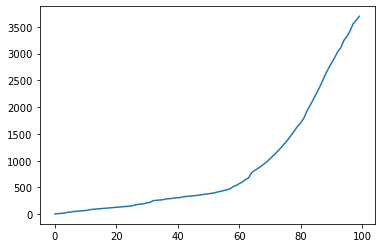

In [6]:
bandit = bnd.LinContextGauss([[0.9,-0.5,0.7],[-0.9,0.8,0.2]])
cv = np.linspace((2,0,3), (0,6,2), 100)
regrets = np.zeros(100)
for i in range(100):
    actions,rewards,regret = KNN_UCB(bandit,i,cv, 0.5, lambda a : 1)
    regrets[i] = regret
plt.plot(regrets)

## One nearest neighbor noiseless reward